## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on='Mouse ID')
combined_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice.
count_mice = combined_df['Mouse ID'].count()
count_mice

1893

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pd.DataFrame(combined_df, 
                             columns=['Mouse ID', 'Timepoint'])
duplicate_mice

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = duplicate_mice[duplicate_mice.duplicated()]
duplicate_mice_data

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_dataset = combined_df.drop(combined_df.index[[909, 911, 913, 915, 917]])
final_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
total_number_df= len(final_dataset.index)
total_number_df

1888

## Summary Statistics

In [14]:
drug_regimen = pd.DataFrame(final_dataset, columns = ["Drug Regimen"])
drug_regimen

,Drug Regimen
0,Ramicane
1,Ramicane
2,Ramicane
3,Ramicane
4,Ramicane
...,...
1888,Naftisol
1889,Naftisol
1890,Naftisol
1891,Naftisol


In [15]:
#Groupby
group_drug_regimen = drug_regimen.groupby(["Drug Regimen"])
group_drug_regimen
group_drug_regimen.count()

""
Drug Regimen
Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn


In [16]:
#DataFrame for Regimen and Tumor Volume
rtv = pd.DataFrame(final_dataset, columns = ["Drug Regimen", "Tumor Volume (mm3)"])
rtv

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_mean = rtv.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.std, np.var])
drug_regimen_mean

,mean,std,var
Drug Regimen,,,
Capomulin,40.675741,4.994774,24.947764
Ceftamin,52.591172,6.268188,39.290177
Infubinol,52.884795,6.567243,43.128684
Ketapril,55.235638,8.279709,68.553577
Naftisol,54.331565,8.134708,66.173479
Placebo,54.033581,7.821003,61.168083
Propriva,52.393463,6.568014,43.138803
Ramicane,40.216745,4.846308,23.486704
Stelasyn,54.233149,7.710419,59.450562


In [18]:
drug_regimen_sem = rtv.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
drug_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [19]:
drug_regimen_median = rtv.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.median])
drug_regimen_median

,median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [20]:
#Combine table
merge_df = drug_regimen_mean.join(drug_regimen_median)
merge_df = merge_df.join(drug_regimen_sem)
merge_df

,mean,std,var,median,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,24.947764,41.557809,0.329346
Ceftamin,52.591172,6.268188,39.290177,51.776157,0.469821
Infubinol,52.884795,6.567243,43.128684,51.820584,0.492236
Ketapril,55.235638,8.279709,68.553577,53.698743,0.603860
Naftisol,54.331565,8.134708,66.173479,52.509285,0.596466
Placebo,54.033581,7.821003,61.168083,52.288934,0.581331
Propriva,52.393463,6.568014,43.138803,50.909965,0.525862
Ramicane,40.216745,4.846308,23.486704,40.673236,0.320955
Stelasyn,54.233149,7.710419,59.450562,52.431737,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Tumor Volume')

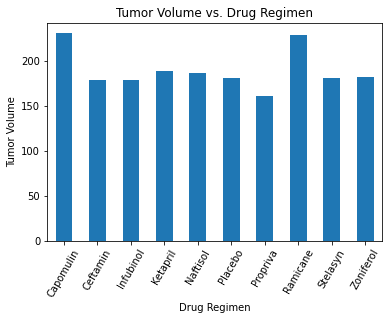

In [22]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Nafitsol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"] 
# tumor_volume = []
# x_axis = np.arange(len(tumor_volume))
# # tick_locations = [value for value in drug_regimen]
# # plt.xticks(tick_locations, drug_regimen)
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Nafitsol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
# plt.bar(x_axis, tumor_volume, color="b", align="center")
# plt.title("Tumor Volume vs. Drug Regimen")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Tumor Volume")
# bar = combined_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
# bar_df= pd.DataFrame(bar)
# bar_df
# plt.title("Tumor Volume vs. Drug Regimen")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Tumor Volume")
bar = combined_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
mbar = pd.DataFrame(bar)
regularbar = mbar.plot.bar(legend=False, rot=60)
plt.title("Tumor Volume vs. Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



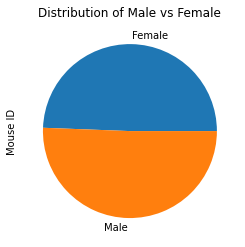

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combined_df.groupby('Sex').count()["Mouse ID"]
gender_df = pd.DataFrame(gender)
gender_df
plt.pie(gender, labels=gender.index),
plt.title("Distribution of Male vs Female")
plt.ylabel("Mouse ID")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
table_combined_df = combined_df

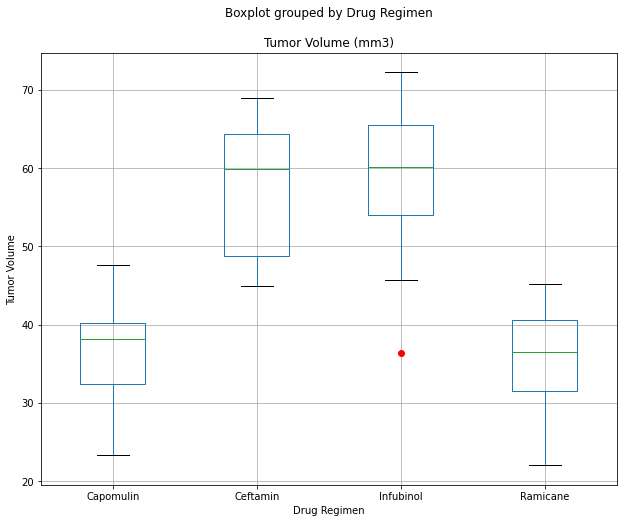

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
time_point = table_combined_df.groupby("Mouse ID").max()["Timepoint"]
tumor_volume = table_combined_df.groupby("Mouse ID").last()["Tumor Volume (mm3)"]
regimen = table_combined_df.groupby("Mouse ID").last()["Drug Regimen"]
new_df = pd.DataFrame({"Drug Regimen": regimen, "Timepoint": time_point, "Tumor Volume (mm3)": tumor_volume})
new_df = new_df.loc[new_df["Drug Regimen"].isin(drug)]
tumor = new_df["Tumor Volume (mm3)"]
quartiles = tumor.quantile([.25, .50, .75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q
plot = new_df.boxplot(by="Drug Regimen", column = "Tumor Volume (mm3)", sym="r", figsize=(10,8))
plot.set_ylabel("Tumor Volume")
plt.show()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capumulin_df = pd.DataFrame(combined_df, columns = ["Drug Regimen", "Mouse ID"])
capumulin_df

,Drug Regimen,Mouse ID
0,Ramicane,k403
1,Ramicane,k403
2,Ramicane,k403
3,Ramicane,k403
4,Ramicane,k403
...,...,...
1888,Naftisol,z969
1889,Naftisol,z969
1890,Naftisol,z969
1891,Naftisol,z969


In [28]:
capumulin_df = capumulin_df.groupby(['Drug Regimen', 'Mouse ID'])
capumulin_df

In [29]:
capumulin_df.count()

Empty DataFrame
Columns: []
Index: [(Capomulin, b128), (Capomulin, b742), (Capomulin, f966), (Capomulin, g288), (Capomulin, g316), (Capomulin, i557), (Capomulin, i738), (Capomulin, j119), (Capomulin, j246), (Capomulin, l509), (Capomulin, l897), (Capomulin, m601), (Capomulin, m957), (Capomulin, r157), (Capomulin, r554), (Capomulin, r944), (Capomulin, s185), (Capomulin, s710), (Capomulin, t565), (Capomulin, u364), (Capomulin, v923), (Capomulin, w150), (Capomulin, w914), (Capomulin, x401), (Capomulin, y793), (Ceftamin, a275), (Ceftamin, b447), (Ceftamin, b487), (Ceftamin, b759), (Ceftamin, f436), (Ceftamin, h531), (Ceftamin, j296), (Ceftamin, k210), (Ceftamin, l471), (Ceftamin, l490), (Ceftamin, l558), (Ceftamin, l661), (Ceftamin, l733), (Ceftamin, o287), (Ceftamin, p438), (Ceftamin, q483), (Ceftamin, t573), (Ceftamin, u149), (Ceftamin, u153), (Ceftamin, w151), (Ceftamin, x226), (Ceftamin, x581), (Ceftamin, x822), (Ceftamin, y769), (Ceftamin, y865), (Infubinol, a203), (Infubinol, a251), (Infubinol, a577), (Infubinol, a685), (Infubinol, c139), (Infubinol, c326), (Infubinol, c895), (Infubinol, e476), (Infubinol, f345), (Infubinol, i386), (Infubinol, k483), (Infubinol, k804), (Infubinol, m756), (Infubinol, n671), (Infubinol, o809), (Infubinol, o813), (Infubinol, q132), (Infubinol, s121), (Infubinol, v339), (Infubinol, v719), (Infubinol, v766), (Infubinol, w193), (Infubinol, w584), (Infubinol, y163), (Infubinol, z581), (Ketapril, a457), (Ketapril, c580), (Ketapril, c819), (Ketapril, c832), (Ketapril, d474), (Ketapril, f278), (Ketapril, f932), (Ketapril, g107), (Ketapril, g497), (Ketapril, h246), (Ketapril, h428), (Ketapril, k382), (Ketapril, l264), (Ketapril, m550), (Ketapril, m650), (Ketapril, n923), (Ketapril, o331), (Ketapril, o973), (Ketapril, p189), (Ketapril, q119), (Ketapril, u327), (Ketapril, v289), (Ketapril, v603), (Ketapril, w422), (Ketapril, y260), ...]

[249 rows x 0 columns]

In [30]:
capumulin_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "b128"]
capumulin_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


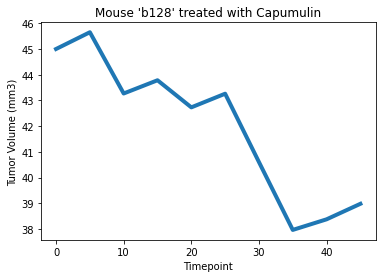

In [31]:
x_axis = capumulin_mouse_df["Timepoint"]
tumor = capumulin_mouse_df["Tumor Volume (mm3)"]
plt.plot(x_axis, tumor, linewidth=4)
plt.title("Mouse 'b128' treated with Capumulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('linechart')
plt.show()

In [37]:
cap_scatter = combined_df.loc[combined_df["Drug Regimen"] == "Capumulin"]
cap_scatter

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [4]:
#Capumulin scatter plot
cap_scatter_df = pd.DataFrame(combined_df, columns = ["Drug Regimen", "Mouse ID"])
cap_scatter_df

NameError: name 'pd' is not defined

In [5]:
cap_scatter_df = cap_scatter_df.groupby(['Drug Regimen', 'Mouse ID']).mean()
cap_scatter_df

NameError: name 'cap_scatter_df' is not defined

In [6]:
cap_scatter_df = combined_df.loc[combined_df["Drug Regimen"] =="Capumulin"]
cap_scatter_df

NameError: name 'combined_df' is not defined

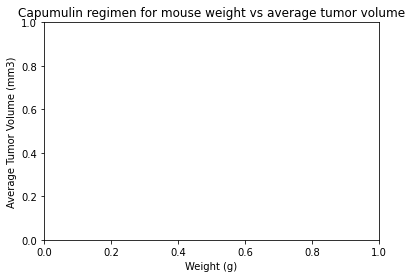

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


plt.title("Capumulin regimen for mouse weight vs average tumor volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
